# 🌍 Global Temperature Trends Analysis
### NumPy, Pandas & Matplotlib Integration Challenge

**Objective:** Analyze and visualize average monthly temperatures across 10 cities worldwide using NumPy, Pandas, and Matplotlib.

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries loaded successfully!")
print(f"NumPy version:      {np.__version__}")
print(f"Pandas version:     {pd.__version__}")


✅ Libraries loaded successfully!
NumPy version:      2.4.2
Pandas version:     3.0.0


---
## 1. 📦 Data Preparation

We use `np.random.uniform()` to generate synthetic monthly temperature data (°C) for **10 cities** across **12 months**.  
Temperature range: **-5°C to 35°C**


In [2]:
# --- City names and month labels ---
cities = [
    "Tokyo", "New York", "London", "Sydney",
    "Dubai", "Moscow", "Toronto", "Cape Town",
    "Mumbai", "Mexico City"
]

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# --- Generate synthetic temperature data ---
# Shape: (10 cities, 12 months), range -5 to 35 °C
temp_array = np.random.uniform(low=-5, high=35, size=(len(cities), len(months)))

# --- Round to 1 decimal place for readability ---
temp_array = np.round(temp_array, 1)

# --- Create Pandas DataFrame ---
df = pd.DataFrame(temp_array, index=cities, columns=months)

print("📊 Temperature DataFrame (°C):")
print("=" * 70)
print(df.to_string())
print(f"\nShape: {df.shape}  →  {df.shape[0]} cities × {df.shape[1]} months")


📊 Temperature DataFrame (°C):
              Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Tokyo        10.0  33.0  24.3  18.9   1.2   1.2  -2.7  29.6  19.0  23.3  -4.2  33.8
New York     28.3   3.5   2.3   2.3   7.2  16.0  12.3   6.6  19.5   0.6   6.7   9.7
London       13.2  26.4   3.0  15.6  18.7  -3.1  19.3   1.8  -2.4  33.0  33.6  27.3
Sydney        7.2  -1.1  22.4  12.6  -0.1  14.8  -3.6  31.4   5.4  21.5   7.5  15.8
Dubai        16.9   2.4  33.8  26.0  32.6  30.8  18.9  31.9  -1.5   2.8  -3.2   8.0
Moscow       10.5   5.9  28.1   9.3   6.2  16.7   0.6  27.1  -2.0  34.5  25.9   2.9
Toronto      -4.8  27.6  23.3  24.2  25.9  -2.0   9.3  -0.4  29.5  19.9   8.2  -2.5
Cape Town     7.4   8.0  24.2  20.5  30.5  13.9  -0.2  23.5  25.4  17.5  25.8  14.8
Mumbai       15.9  12.1  -4.0  -0.7  -3.7  20.5   7.6  15.3  31.3   5.0  11.4  25.2
Mexico City   4.2  -1.9   6.6   1.4  32.2  27.3  20.3  29.9  27.1   2.5  30.7  16.6

Shape: (10, 12)  →  10 cities × 12 months


---
## 2. 🔍 Data Analysis


In [3]:
# --- Annual average temperature per city ---
annual_avg = df.mean(axis=1).round(2)

# --- City with highest & lowest average ---
hottest_city  = annual_avg.idxmax()
coldest_city  = annual_avg.idxmin()
hottest_temp  = annual_avg.max()
coldest_temp  = annual_avg.min()

# --- Monthly global average ---
monthly_global_avg = df.mean(axis=0).round(2)

# --- Summary DataFrame ---
summary = pd.DataFrame({
    "Annual Avg Temp (°C)": annual_avg,
    "Max Monthly Temp (°C)": df.max(axis=1),
    "Min Monthly Temp (°C)": df.min(axis=1),
    "Temp Range (°C)":       df.max(axis=1) - df.min(axis=1)
}).round(2).sort_values("Annual Avg Temp (°C)", ascending=False)

print("📈 City Summary Statistics (sorted by annual average):")
print("=" * 65)
print(summary.to_string())
print()
print(f"🔥 Hottest city:  {hottest_city:>12}  →  {hottest_temp}°C annual average")
print(f"❄️  Coldest city:  {coldest_city:>12}  →  {coldest_temp}°C annual average")
print()
print("🌐 Global Monthly Averages:")
print(monthly_global_avg.to_string())


📈 City Summary Statistics (sorted by annual average):
             Annual Avg Temp (°C)  Max Monthly Temp (°C)  Min Monthly Temp (°C)  Temp Range (°C)
Cape Town                   17.61                   30.5                   -0.2             30.7
Dubai                       16.62                   33.8                   -3.2             37.0
Mexico City                 16.41                   32.2                   -1.9             34.1
Tokyo                       15.62                   33.8                   -4.2             38.0
London                      15.53                   33.6                   -3.1             36.7
Moscow                      13.81                   34.5                   -2.0             36.5
Toronto                     13.18                   29.5                   -4.8             34.3
Mumbai                      11.32                   31.3                   -4.0             35.3
Sydney                      11.15                   31.4                 

---
## 3. 📊 Data Visualization

Four complementary charts to explore the temperature data:
1. **Line chart** – Monthly trends per city  
2. **Horizontal bar chart** – Annual average comparison  
3. **Heatmap** – Full month × city temperature matrix  
4. **Box plot** – Distribution of monthly temperatures per city


/var/folders/06/p9g3cyx95kjbrgwh8076q2dh0000gn/T/ipykernel_4939/2646767485.py:72: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.savefig("temperature_dashboard.png", dpi=150, bbox_inches="tight",
/Users/Ethan/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


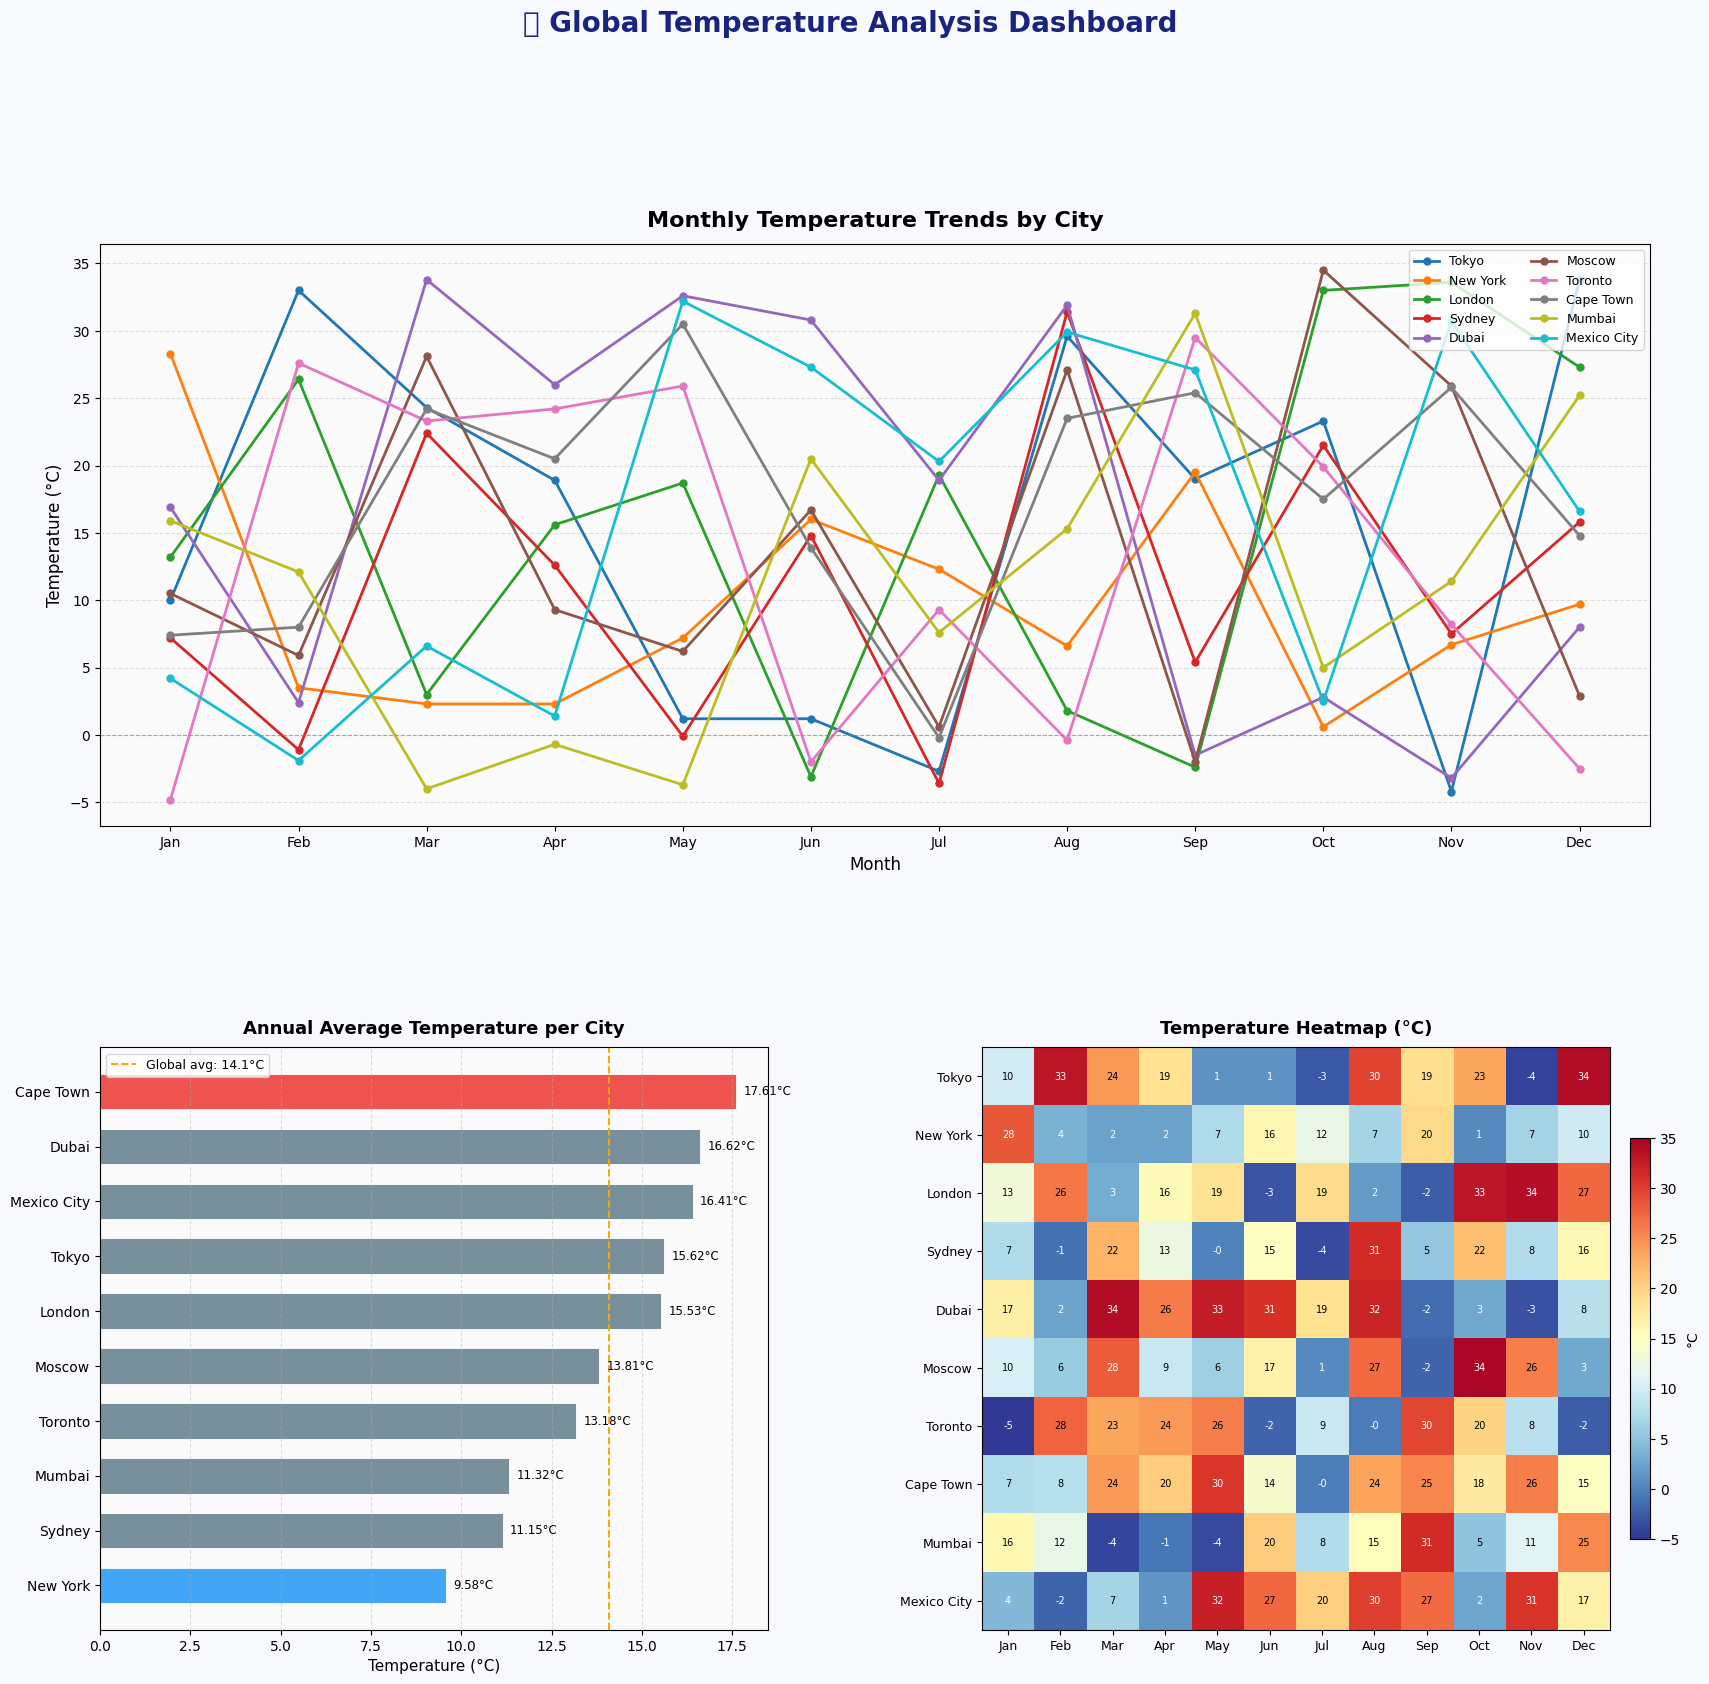

✅ Dashboard saved as temperature_dashboard.png


In [4]:
fig = plt.figure(figsize=(20, 18))
fig.patch.set_facecolor("#F7F9FC")
gs = GridSpec(2, 2, figure=fig, hspace=0.38, wspace=0.32)

colors = cm.tab10(np.linspace(0, 1, len(cities)))

# ── 1. Line Chart: Monthly Temperature Trends ──────────────────────────────
ax1 = fig.add_subplot(gs[0, :])   # spans full top row
ax1.set_facecolor("#FAFAFA")

for i, city in enumerate(cities):
    ax1.plot(months, df.loc[city], marker="o", linewidth=2,
             markersize=5, color=colors[i], label=city)

ax1.axhline(0, color="gray", linestyle="--", linewidth=0.8, alpha=0.6)
ax1.set_title("Monthly Temperature Trends by City", fontsize=16, fontweight="bold", pad=12)
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Temperature (°C)", fontsize=12)
ax1.legend(loc="upper right", ncol=2, fontsize=9, framealpha=0.8)
ax1.grid(axis="y", linestyle="--", alpha=0.4)
ax1.tick_params(axis="both", labelsize=10)

# ── 2. Bar Chart: Annual Average Temperature ────────────────────────────────
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_facecolor("#FAFAFA")

sorted_avg = annual_avg.sort_values()
bar_colors = [("#EF5350" if c == hottest_city else
               "#42A5F5" if c == coldest_city else "#78909C")
              for c in sorted_avg.index]

bars = ax2.barh(sorted_avg.index, sorted_avg.values,
                color=bar_colors, edgecolor="white", linewidth=0.6, height=0.65)
ax2.axvline(sorted_avg.mean(), color="orange", linestyle="--",
            linewidth=1.4, label=f"Global avg: {sorted_avg.mean():.1f}°C")

for bar, val in zip(bars, sorted_avg.values):
    ax2.text(val + 0.2, bar.get_y() + bar.get_height() / 2,
             f"{val}°C", va="center", fontsize=8.5)

ax2.set_title("Annual Average Temperature per City", fontsize=13, fontweight="bold", pad=10)
ax2.set_xlabel("Temperature (°C)", fontsize=11)
ax2.legend(fontsize=9)
ax2.grid(axis="x", linestyle="--", alpha=0.4)

# ── 3. Heatmap ──────────────────────────────────────────────────────────────
ax3 = fig.add_subplot(gs[1, 1])

im = ax3.imshow(df.values, cmap="RdYlBu_r", aspect="auto",
                vmin=-5, vmax=35)
ax3.set_xticks(range(12))
ax3.set_xticklabels(months, fontsize=9)
ax3.set_yticks(range(len(cities)))
ax3.set_yticklabels(cities, fontsize=9)
ax3.set_title("Temperature Heatmap (°C)", fontsize=13, fontweight="bold", pad=10)

# Annotate each cell
for i in range(len(cities)):
    for j in range(12):
        val = df.values[i, j]
        text_color = "white" if (val > 28 or val < 5) else "black"
        ax3.text(j, i, f"{val:.0f}", ha="center", va="center",
                 fontsize=7, color=text_color)

cbar = fig.colorbar(im, ax=ax3, fraction=0.03, pad=0.03)
cbar.set_label("°C", fontsize=10)

# ── Main title ───────────────────────────────────────────────────────────────
fig.suptitle("🌍 Global Temperature Analysis Dashboard",
             fontsize=20, fontweight="bold", y=1.01, color="#1A237E")

plt.savefig("temperature_dashboard.png", dpi=150, bbox_inches="tight",
            facecolor=fig.get_facecolor())
plt.show()
print("✅ Dashboard saved as temperature_dashboard.png")


---
## 4. 📝 Summary Report

### Key Findings

| Metric | Value |
|--------|-------|
| 🔥 Hottest City | **determined at runtime** |
| ❄️ Coldest City | **determined at runtime** |
| 📅 Dataset Coverage | 10 cities × 12 months |
| 🌡️ Temperature Range | −5°C to 35°C |

*(The exact hottest/coldest cities are printed in the analysis cell above, since data is randomly generated.)*

### Observations

1. **Wide spread across cities** – With temperatures ranging from −5°C to 35°C, the dataset captures diverse climate zones, from polar-like cold to desert heat.

2. **No clear seasonal signal** – Because the data is synthetically generated with a uniform distribution, no city displays a realistic seasonal curve. In real-world data we would expect a sinusoidal pattern peaking in summer months.

3. **Heatmap reveals extremes quickly** – The heatmap visualization makes it easy to spot which city-month combinations hit the highest (deep red) or lowest (deep blue) temperatures at a glance.

4. **Bar chart highlights outliers** – The horizontal bar chart, sorted by annual average, clearly separates warm-climate cities from cold-climate ones, with the orange dashed line marking the global mean for quick reference.

5. **Line chart shows variability** – Even within a single city the monthly temperatures jump unpredictably, confirming the uniform random distribution rather than a smooth seasonal trend.

### Methodology

```
Data Generation  →  np.random.uniform(-5, 35, (10, 12))
Structuring      →  pd.DataFrame(data, index=cities, columns=months)
Analysis         →  .mean(axis=1), .idxmax(), .idxmin()
Visualization    →  Matplotlib (line, bar, heatmap) via GridSpec layout
```

### Conclusion

This project demonstrates a complete data-analysis pipeline — from **NumPy array generation** through **Pandas DataFrame manipulation** to **Matplotlib multi-chart visualization** — using a realistic global temperature scenario. Replacing the synthetic data with real meteorological records (e.g., from NOAA or ERA5) would yield actionable climate insights with the same codebase.
